In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#dir(prophet)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ADA-USD.csv to ADA-USD (1).csv
User uploaded file "ADA-USD.csv" with length 229732 bytes


In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['ADA-USD.csv'].decode('utf-8')))
df= df.drop(columns = ['open','low','high','volume','close'])
df.head()

,timestamp,adjclose
0,2017-11-09 00:00:00,0.032053
1,2017-11-10 00:00:00,0.027119
2,2017-11-11 00:00:00,0.027437
3,2017-11-12 00:00:00,0.023977
4,2017-11-13 00:00:00,0.025808


In [ ]:
df['timestamp'] = pd.to_datetime(df["timestamp"])
df.set_index('timestamp', inplace = True)


Text(0, 0.5, 'price (in USD)')

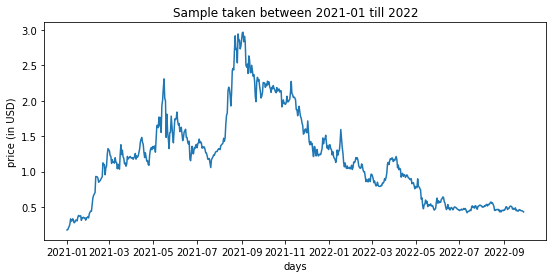

In [ ]:
plt.figure(figsize=(9,4))
df = df.loc['2021-01' : '2022']
plt.plot(df['adjclose'])
plt.title("Sample taken between 2021-01 till 2022" )
plt.xlabel("days")
plt.ylabel("price (in USD)")

In [ ]:
#df.columns = ['ds','y']
df['y']= df['adjclose'][:]
df['ds'] = df.index.values
a = np.arange(len(df))
df.set_index(a, inplace = True)

In [ ]:
df = df.drop(columns =['adjclose'])
df

,y,ds
0,0.175350,2021-01-01 00:00:00
1,0.177423,2021-01-02 00:00:00
2,0.204995,2021-01-03 00:00:00
3,0.224762,2021-01-04 00:00:00
4,0.258314,2021-01-05 00:00:00
...,...,...
631,0.451600,2022-09-24 00:00:00
632,0.446188,2022-09-25 00:00:00
633,0.446757,2022-09-26 00:00:00
634,0.441890,2022-09-27 00:00:00


In [ ]:
df['ds'] = pd.to_datetime(df["ds"])

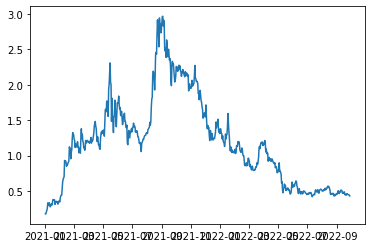

In [ ]:
plt.plot(df['ds'],df['y'])

In [ ]:
len(df)

636

In [ ]:

to_row = int(len(df)-166)
train  = df.iloc[:len(df)-166]
test = df.iloc[to_row:]
test

,y,ds
470,0.952640,2022-04-16 00:00:00
471,0.917466,2022-04-17 00:00:00
472,0.936730,2022-04-18 00:00:00
473,0.953333,2022-04-19 00:00:00
474,0.937341,2022-04-20 00:00:00
...,...,...
631,0.451600,2022-09-24 00:00:00
632,0.446188,2022-09-25 00:00:00
633,0.446757,2022-09-26 00:00:00
634,0.441890,2022-09-27 00:00:00


In [ ]:
df.head()

,y,ds
0,0.175350,2021-01-01
1,0.177423,2021-01-02
2,0.204995,2021-01-03
3,0.224762,2021-01-04
4,0.258314,2021-01-05


In [ ]:
df.tail()

,y,ds
631,0.451600,2022-09-24 00:00:00
632,0.446188,2022-09-25 00:00:00
633,0.446757,2022-09-26 00:00:00
634,0.441890,2022-09-27 00:00:00
635,0.429608,2022-09-28 08:54:00


In [ ]:
# Initialize the Model
from prophet import Prophet
model= Prophet()
model.fit(train)
future = model.make_future_dataframe(periods =166)
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_y0dmmgu/pnt1jta7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_y0dmmgu/i7tt9tiz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29095', 'data', 'file=/tmp/tmp_y0dmmgu/pnt1jta7.json', 'init=/tmp/tmp_y0dmmgu/i7tt9tiz.json', 'output', 'file=/tmp/tmp_y0dmmgu/prophet_model46gdifwc/prophet_model-20230311195258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:52:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:52:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
631,2022-09-24,-0.324191,-0.852801,0.141943,-0.684896,-0.026087,0.003909,0.003909,0.003909,0.003909,0.003909,0.003909,0.0,0.0,0.0,-0.320282
632,2022-09-25,-0.330787,-0.857560,0.145971,-0.694082,-0.030256,0.007901,0.007901,0.007901,0.007901,0.007901,0.007901,0.0,0.0,0.0,-0.322885
633,2022-09-26,-0.337383,-0.857503,0.111322,-0.702681,-0.033788,-0.007059,-0.007059,-0.007059,-0.007059,-0.007059,-0.007059,0.0,0.0,0.0,-0.344442
634,2022-09-27,-0.343979,-0.900530,0.161675,-0.711977,-0.038095,-0.011033,-0.011033,-0.011033,-0.011033,-0.011033,-0.011033,0.0,0.0,0.0,-0.355011
635,2022-09-28,-0.350574,-0.852947,0.113026,-0.722772,-0.044998,0.000593,0.000593,0.000593,0.000593,0.000593,0.000593,0.0,0.0,0.0,-0.349981


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()
future=pd.DataFrame(forecast,columns=['ds','yhat','yhat_lower','yhat_upper'])


In [ ]:
# from google.colab import files
# future.to_csv('BNB_predictions.csv', encoding = 'utf-8-sig')
# files.download('BNB_predictions.csv')

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
631,2022-09-24,-0.320282,-0.852801,0.141943
632,2022-09-25,-0.322885,-0.857560,0.145971
633,2022-09-26,-0.344442,-0.857503,0.111322
634,2022-09-27,-0.355011,-0.900530,0.161675
635,2022-09-28,-0.349981,-0.852947,0.113026


In [ ]:
test.tail()

,y,ds
631,0.451600,2022-09-24 00:00:00
632,0.446188,2022-09-25 00:00:00
633,0.446757,2022-09-26 00:00:00
634,0.441890,2022-09-27 00:00:00
635,0.429608,2022-09-28 08:54:00


In [ ]:
train.tail()

,y,ds
465,0.920450,2022-04-11
466,0.955145,2022-04-12
467,0.974696,2022-04-13
468,0.932412,2022-04-14
469,0.954717,2022-04-15


In [ ]:
plot_plotly(model,forecast)

In [ ]:
validate = model.predict(test)
validate[['ds','yhat','yhat_lower','yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-16,0.741657,0.356336,1.107559
1,2022-04-17,0.739054,0.363580,1.138273
2,2022-04-18,0.717498,0.338872,1.095560
3,2022-04-19,0.706928,0.366118,1.119342
4,2022-04-20,0.711958,0.321362,1.076564
5,2022-04-21,0.711104,0.345325,1.104216
6,2022-04-22,0.697527,0.323431,1.064031
7,2022-04-23,0.695486,0.338231,1.074343
8,2022-04-24,0.692883,0.320155,1.082020
9,2022-04-25,0.671326,0.312563,1.026785


In [ ]:
model_predictions= validate['yhat'].values
model_predictions


array([ 7.41656963e-01,  7.39053882e-01,  7.17497749e-01,  7.06927966e-01,
        7.11958174e-01,  7.11103632e-01,  6.97526831e-01,  6.95485690e-01,
        6.92882609e-01,  6.71326476e-01,  6.60756693e-01,  6.65786901e-01,
        6.64932359e-01,  6.51355558e-01,  6.49314417e-01,  6.46711335e-01,
        6.25155203e-01,  6.14585420e-01,  6.19615628e-01,  6.18761086e-01,
        6.05184284e-01,  6.03143143e-01,  6.00540062e-01,  5.78983930e-01,
        5.68414146e-01,  5.73444354e-01,  5.72589813e-01,  5.59013011e-01,
        5.56971870e-01,  5.54368789e-01,  5.32812656e-01,  5.22242873e-01,
        5.27273081e-01,  5.26418540e-01,  5.12841738e-01,  5.10800597e-01,
        5.08197516e-01,  4.86641383e-01,  4.76071600e-01,  4.81101808e-01,
        4.80247266e-01,  4.66670465e-01,  4.64629324e-01,  4.62026243e-01,
        4.40470110e-01,  4.29900327e-01,  4.34930535e-01,  4.34075993e-01,
        4.20499192e-01,  4.18458050e-01,  4.15854969e-01,  3.94298837e-01,
        3.83729054e-01,  

In [ ]:
testing_data= test['y'].values
testing_data.shape

(166,)

Model Validation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


#Method 1: Using R2 SCORE
print("Computing the R-squared value:")
r2_score = r2_score(testing_data,model_predictions)
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:-9.52780069221373


In [ ]:
# Method2: Report performance check with MEAN ABSOLUTE PERCENTAGE ERROR
MAPE = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data)) / np.abs(testing_data))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.7125324832978349


In [ ]:
# Method3: Using MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(model_predictions,testing_data)
print(f'Mean_Absolute_Error:{MAE}')

Mean_Absolute_Error:0.35615827444309495


In [ ]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(model_predictions,testing_data)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.4295836169685643


Visualization of Results

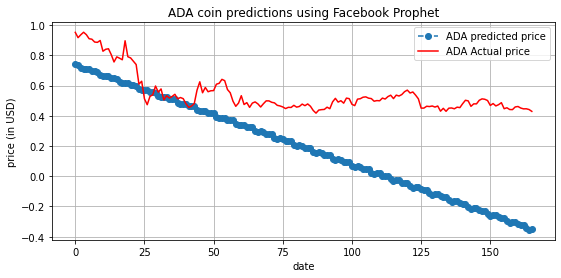

In [ ]:
plt.figure(figsize=(9,4))
plt.grid(True)
date_range = np.arange(len(testing_data))
#plt.plot(date_range, model_predictions[:-1],color='blue',marker='o',linestyle ='dashed',label = "ADA predicted price")
plt.plot(date_range,model_predictions,marker='o',linestyle ='dashed',label = "ADA predicted price")
plt.plot(date_range,testing_data,color='red',label = "ADA Actual price")
plt.title("ADA coin predictions using Facebook Prophet")
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.tight_layout
plt.show()

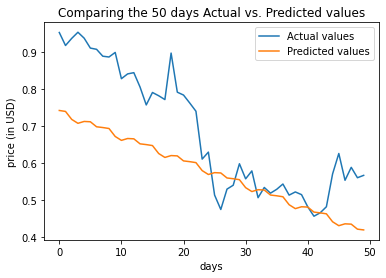

In [ ]:
plt.plot(testing_data[:50],label = 'Actual values')
plt.plot(model_predictions[:50], label = 'Predicted values')
plt.title('Comparing the 50 days Actual vs. Predicted values')
plt.xlabel('days')
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

Model Validation of Forecasting of Next 10 days

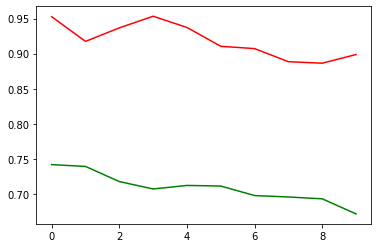

In [ ]:
Actual = testing_data[:10]
predicted = model_predictions[:10]
plt.plot(Actual, color='red')
plt.plot(predicted,color = 'green')

In [ ]:
# performance Evaluation of 10 days Predictions

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("Computing the R-squared value:")
r2_score = r2_score(Actual,predicted)
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:-78.85951810768228


In [ ]:
# report performance
MAPE = np.mean(np.abs(np.array(predicted) - np.array(Actual)) / np.abs(Actual))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.22874578562559456


In [ ]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(Actual, predicted)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.21118575350008514


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(predicted,Actual))

0.21032660409394793
